In [1]:
import keras
import numpy as np

from data_loader import Data

Using TensorFlow backend.


In [47]:
model_path = 'models/batch50-epochs100-lstm2x32-lookback16.model.hdf5'
model = keras.models.load_model(model_path)

epochs = 200
batch_size = model.layers[1].input_shape[0]
lookback = model.layers[1].input_shape[1]
width = model.layers[-1].input_shape[-1]
layers = len(model.layers) - 2

In [48]:
data = Data(lookback=lookback, batch_size=batch_size)

In [49]:
test_error = model.evaluate(x=data.test.features, y=data.test.vasopressin, batch_size=batch_size)
test_error

31400/31400 [==============================] - 27s 847us/step

4.924543434307385e-06

In [50]:
with open('models/summary.csv', 'a') as f:
    f.write(f'{batch_size},{epochs},{width},{layers},{lookback},{test_error}\n')

# Plot

In [6]:
preds = model.predict(data.test.features[:100], batch_size=batch_size)

In [7]:
import matplotlib.pyplot as plt
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn'])

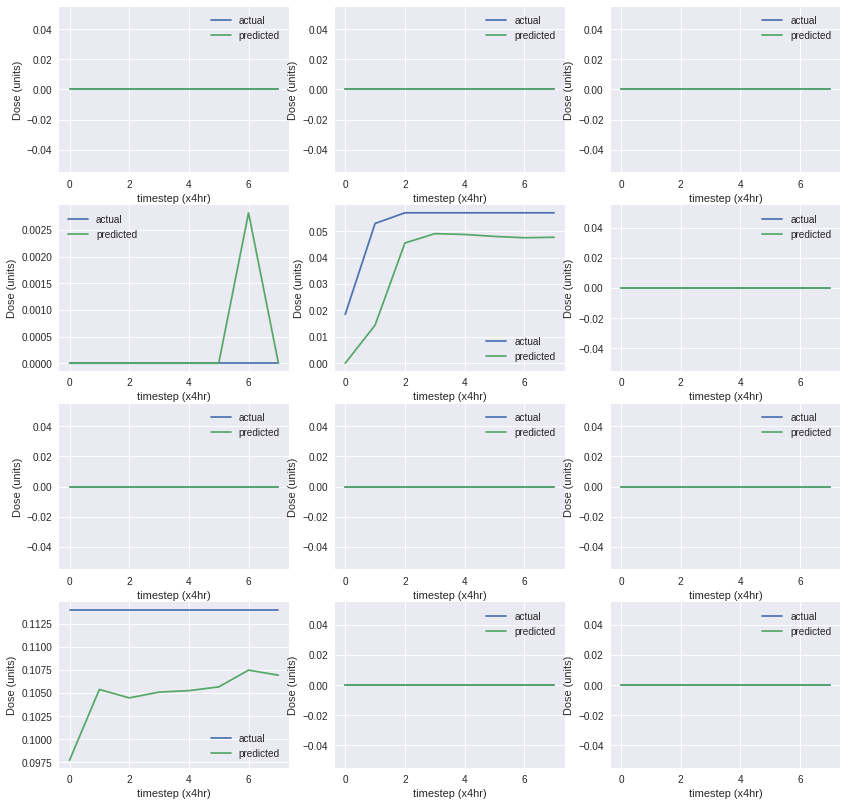

In [10]:
f, ax = plt.subplots(4, 3, figsize=(14, 14))
threshold = 0.002
preds[preds < threshold] = 0

for n, i in enumerate(range(12)):
    d = data.test.vasopressin[i]
    x = range(len(d))
    ax = plt.subplot(4, 3, n + 1)
    ax.plot(d, label='actual')
    ax.plot(preds[i][:len(d)], label='predicted')
    ax.set_xlabel('timestep (x4hr)')
    ax.set_ylabel('Dose (units)')
    # plt.xlim([0, np.array(np.where(d==-1)).min() -6])
    ax.legend()

f.savefig('figures/predicted_vasopressin.png', dpi=200, )

# History

In [ ]:
import pickle